In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [83]:
data = pd.read_excel("C:/Users/sarth/Downloads/Customer_Segemnt_Train.xlsx")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Spending_Score_num
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,3
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,2
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8068 non-null   int64  
 1   Gender              8068 non-null   object 
 2   Ever_Married        7928 non-null   object 
 3   Age                 8068 non-null   int64  
 4   Graduated           7990 non-null   object 
 5   Profession          7944 non-null   object 
 6   Work_Experience     7239 non-null   float64
 7   Spending_Score      8068 non-null   object 
 8   Family_Size         7733 non-null   float64
 9   Var_1               7992 non-null   object 
 10  Segmentation        8068 non-null   object 
 11  Spending_Score_num  8068 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 756.5+ KB


In [85]:
data.dropna(subset = ["Var_1","Ever_Married","Graduated","Profession"],inplace=True)

In [86]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Spending_Score_num
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,3
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,2
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


In [87]:
data['Family_Size'].fillna(2,inplace = True) #2 is the maximum occuring family size
data['Work_Experience'].fillna(data['Work_Experience'].mean(),inplace = True)

In [88]:
data['Family_Size'].isnull().sum()

0

In [89]:
data.drop(columns = ['ID'],inplace=True)

In [ ]:
data

In [90]:
cat_var = ['Gender','Ever_Married','Graduated','Profession','Var_1']

In [91]:
data_cat = pd.get_dummies(data[cat_var],drop_first=True )
data_cat

,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8064,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
8065,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
8066,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [92]:
data_cat = data_cat.astype(int)

In [93]:
data_new = data.drop(columns = cat_var)

In [94]:
data_new = pd.concat([data_new,data_cat],axis = 1)
data_new

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Spending_Score_num,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.000000,Low,4.0,D,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,38,2.636206,Average,3.0,A,3,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,67,1.000000,Low,1.0,B,3,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,67,0.000000,High,2.0,B,2,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,40,2.636206,High,6.0,A,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.000000,High,5.0,B,3,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
8064,35,3.000000,Low,4.0,D,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8065,33,1.000000,Low,1.0,D,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8066,27,1.000000,Low,4.0,B,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [95]:
data_new.drop(columns = ['Spending_Score'],inplace=True)

In [96]:
data_new.head()

,Age,Work_Experience,Family_Size,Segmentation,Spending_Score_num,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.000000,4.0,D,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,38,2.636206,3.0,A,3,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,67,1.000000,1.0,B,3,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,67,0.000000,2.0,B,2,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,40,2.636206,6.0,A,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
label_encoder = LabelEncoder()
data_new['Segmentation'] = label_encoder.fit_transform(data_new['Segmentation'])
data_new['Segmentation']

0       3
1       0
2       1
3       1
4       0
       ..
8062    1
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 7669, dtype: int32

In [99]:
from sklearn.preprocessing import LabelEncoder
Y = data_new['Segmentation']
X = data_new.drop(columns = ['Segmentation'],inplace=True)

In [100]:
X = data_new

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [102]:
X_train['Family_Size'].mode()

0    2.0
Name: Family_Size, dtype: float64

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
estimator = LogisticRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(estimator, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.45639772, 0.49388753, 0.48736756, 0.48573757, 0.49551752])

In [105]:
from sklearn.ensemble import RandomForestClassifier 
estimator2 = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(estimator2, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores

array([0.45150774, 0.48981255, 0.48899756, 0.47677262, 0.49144254])

In [106]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)


C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
y_train_pred = logistic_model.predict(X_train)
y_train_pred

array([2, 1, 2, ..., 3, 3, 2])

In [111]:
(y_train_pred==y_train).sum()/y_train.shape[0]

0.49356153219233906

In [112]:
y_test_pred = logistic_model.predict(X_test)
y_test_pred

array([3, 1, 3, ..., 0, 0, 3])

In [113]:
(y_test_pred==y_test).sum()/y_test.shape[0]

0.49022164276401564

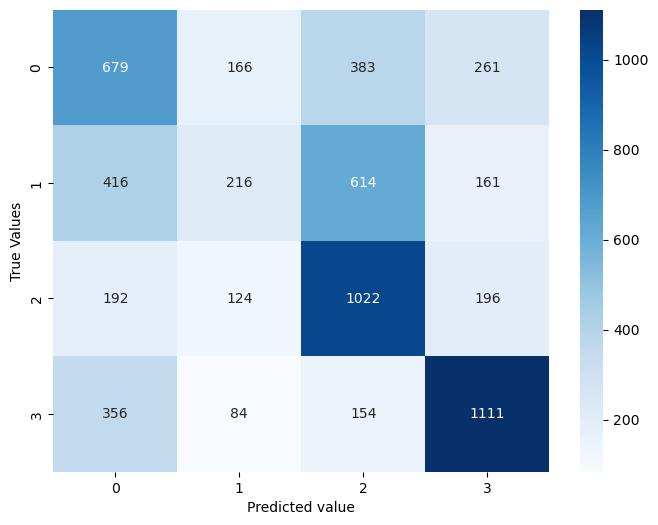

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_train,y_train_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap = "Blues",fmt= 'g')
plt.xlabel("Predicted value")
plt.ylabel("True Values")
plt.show()